## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train = pd.read_csv("DailyDelhiClimateTrain.csv")
test = pd.read_csv("DailyDelhiClimateTest.csv")
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


(None, None)

# Train and Test Visulaization 

In [3]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')
train['year'] = train['date'].dt.year
train["month"] = train["date"].dt.month
print(train.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


In [4]:
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')
test['year'] = test['date'].dt.year
test["month"] = test["date"].dt.month
print(test.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
1 2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2 2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
3 2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
4 2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1


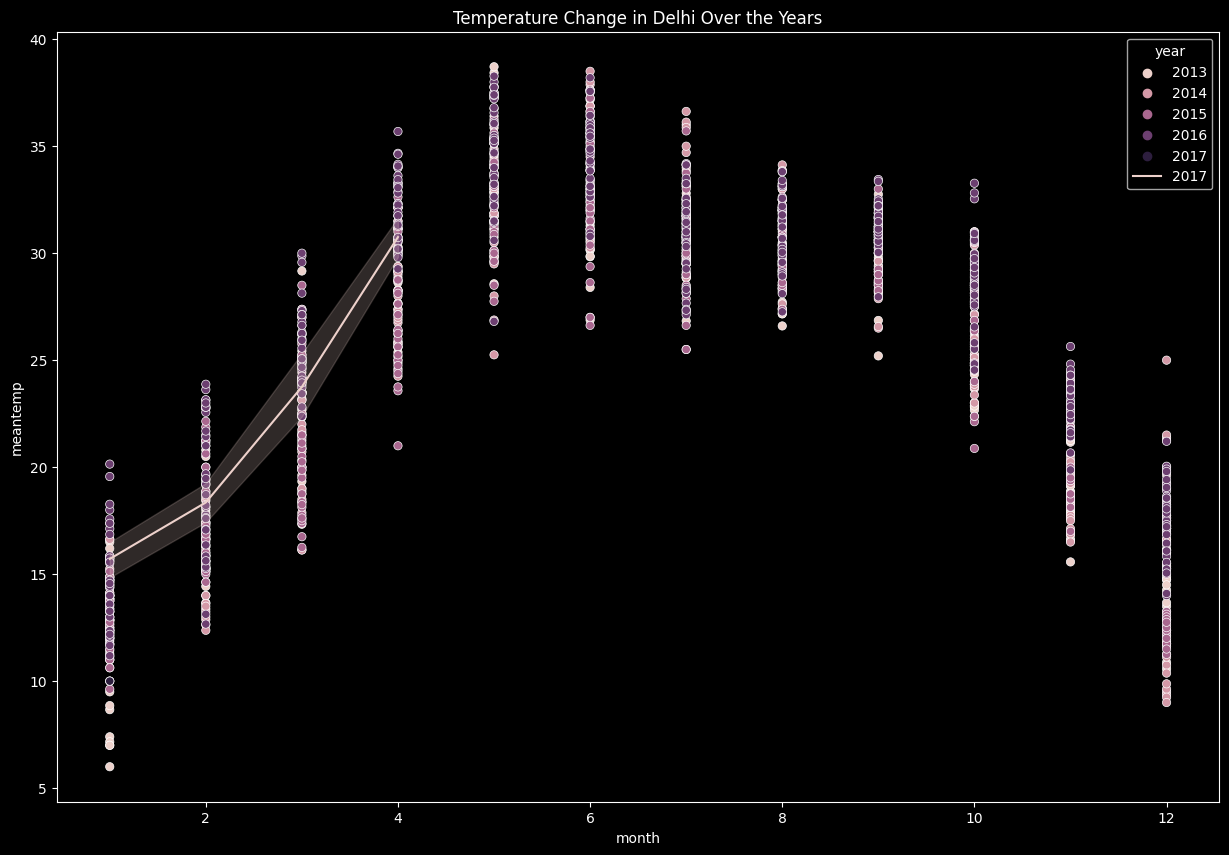

In [5]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.scatterplot(data = train, x='month', y='meantemp', hue='year')
sns.lineplot(data = test, x='month', y='meantemp', hue='year')
plt.show()

### Split data into X and y

In [6]:
# split the data into train and validation set
X_train = train.drop(['date', 'meantemp'], axis=1)
X_test = test.drop(['date', 'meantemp'], axis=1)
y_train = train['meantemp']
y_test = test['meantemp']

# Decision Tree Model

In [7]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

### Model Evaluation

In [8]:
# Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  3.1901435149428026
MSE:  15.764440439259104
RMSE:  3.970445874112768
